## Basic Information about the Discussion Forum

#### Techniques applied: Histogram, Bar Chart, Linear Regression, LinearRegression Machine Learning, LinearRegressionClassification Machine Learning

HIST 180 "The Middle East" is a four unit class at USC. Students are required to post at least five threads about the reading materials on an online discussion forum before the end of the semester. This analysis shows some traits regarding students posting threads. The data is collected two weeks before the end of the semester.

## Preparation

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# dfs is the raw data regarding the discussion forum posts.
dfs = pd.read_excel('Discussion Post rawdata.xlsx')[['Date\xa0Sorted Descending Order', 'Thread', 'Author']]
dfs.columns = ['Time', 'Thread Name', 'Author']
def refinetext(X):
    temp1 = []
    for thread in X:
        temp2 = thread.split('\xa0')
        if temp2[0] == '':
            temp1.append(thread.split('\xa0')[1])
        else:
            temp1.append(thread.split('\xa0')[0])
    return temp1
dfs['Thread Name'] = refinetext(dfs['Thread Name'])
dfs['Author'] = refinetext(dfs['Author'])

## When do students usually post (in a day/week/semester)?

### In a day

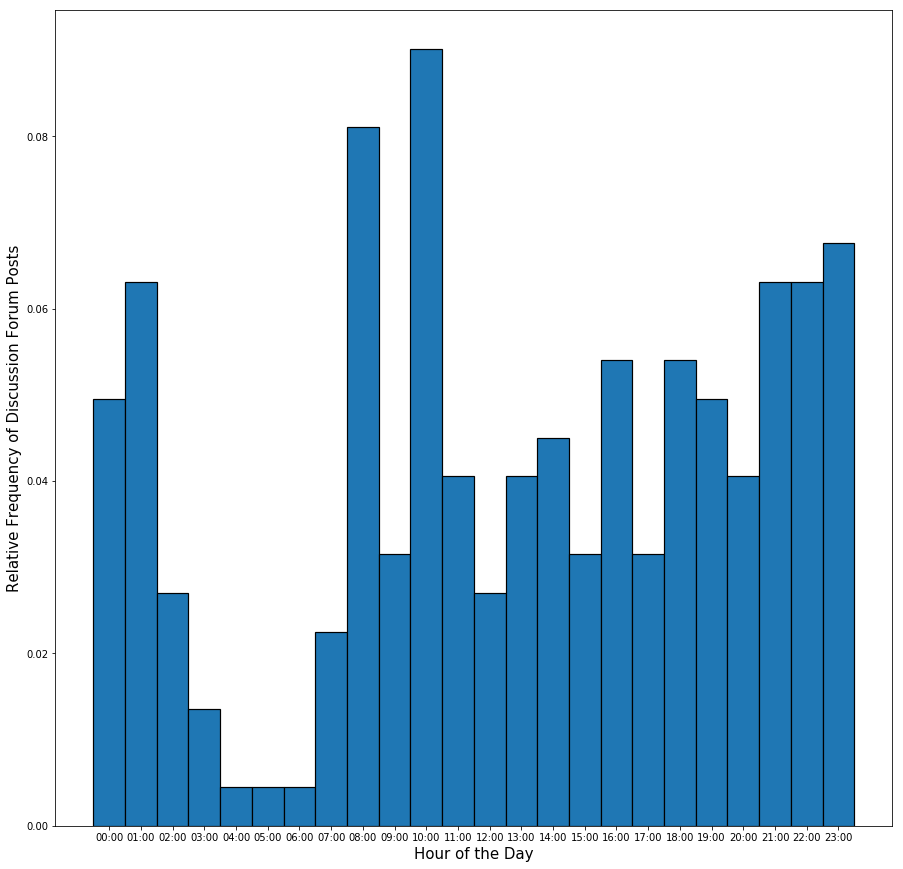

In [3]:
temp_hour = []
for time in dfs.Time:
    temp_hour.append(time.hour)
dfs['Hour'] = temp_hour
fig, ax = plt.subplots(figsize=(15, 15))
ax.hist(dfs.Hour, bins = np.arange(25), density=True, alpha=1, edgecolor='black', linewidth=1.2)
plt.xlabel('Hour of the Day', fontsize = 15)
plt.ylabel('Relative Frequency of Discussion Forum Posts', fontsize = 15)
temp_hr = "00:00 01:00 02:00 03:00 04:00 05:00 06:00 07:00 08:00 09:00 10:00 11:00 12:00 13:00 14:00 15:00 16:00 17:00 18:00 19:00 20:00 21:00 22:00 23:00".split()
plt.xticks(np.arange(0.5, 24.5, 1), temp_hr)
plt.show()

Conclusion: Students are most likely to post threads in the morning or at midnight.

### In a week

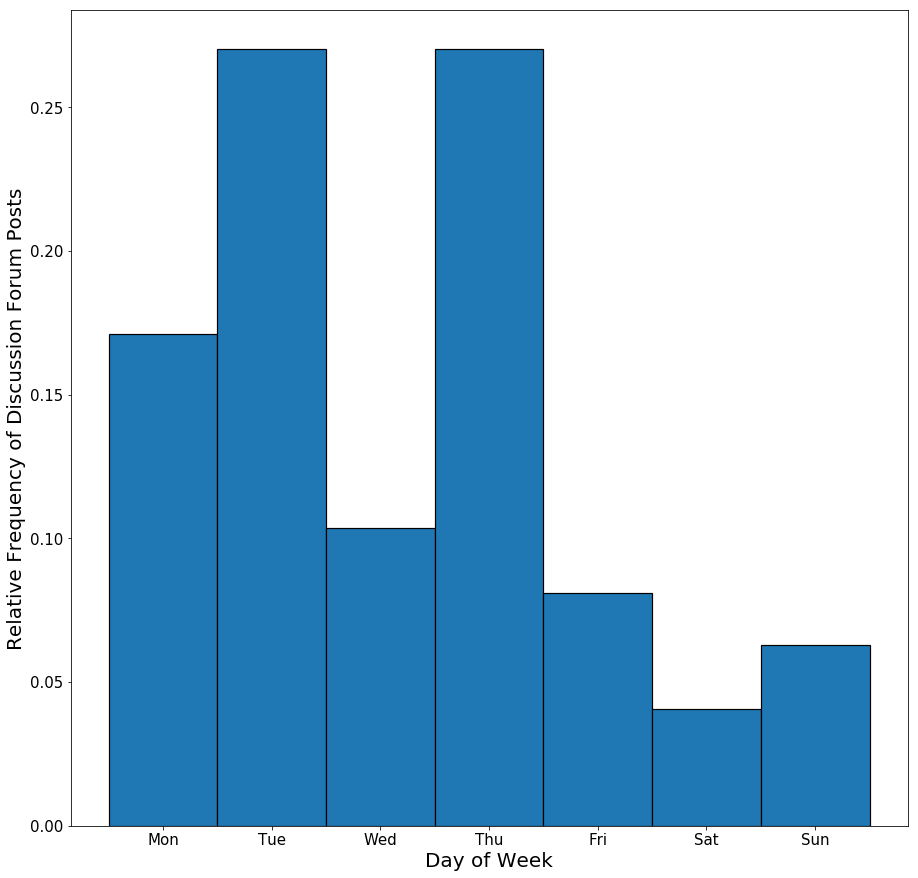

In [4]:
temp_day = []
for day in dfs.Time:
    temp_day.append(day.weekday())
dfs['Day of Week'] = temp_day
fig, ax = plt.subplots(figsize=(15, 15))
ax.hist(dfs['Day of Week'], bins = np.arange(8), density=True, alpha=1, edgecolor='black', linewidth=1.2)
plt.xlabel('Day of Week', fontsize = 20)
plt.ylabel('Relative Frequency of Discussion Forum Posts', fontsize = 20)
plt.xticks(np.arange(0.5, 7.5, 1), "Mon Tue Wed Thu Fri Sat Sun".split(), fontsize = 15)
plt.yticks(fontsize = 15)
plt.show()

Conclusion: Students are most likely to post threads on Tuesday and Thursday, the days that have class. Students seem to be reluctant to work at weekends.

## In a semester

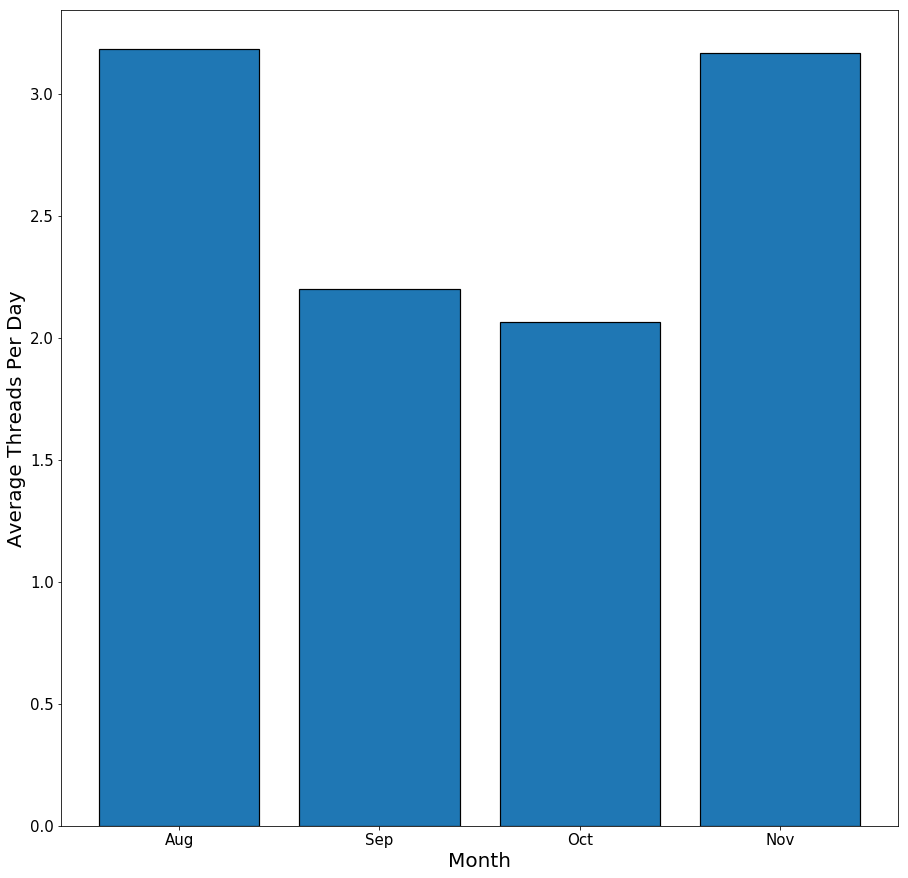

In [5]:
temp_month = []
for month in dfs.Time:
    temp_month.append(month.month)
dfs['Month'] = temp_month
monthlist = dfs.Month.unique()
amount_by_month = []
for month in monthlist:
    amount_by_month.append(len(dfs[dfs.Month == month]))
dist_by_month = pd.DataFrame({'Month': monthlist, 'Average Threads': amount_by_month})
dist_by_month = dist_by_month.sort_values('Month').reset_index(drop = True)
dist_by_month['Average Threads'] = [dist_by_month['Average Threads'].iloc[0]/11, dist_by_month['Average Threads'].iloc[1]/30, dist_by_month['Average Threads'].iloc[2]/31, dist_by_month['Average Threads'].iloc[3]/18]
fig, ax = plt.subplots(figsize=(15, 15))
ax.bar(dist_by_month['Month'], dist_by_month['Average Threads'], edgecolor='black', linewidth=1.2)
plt.xlabel('Month', fontsize = 20)
plt.ylabel('Average Threads Per Day', fontsize = 20)
plt.xticks(np.arange(8, 12), ['Aug', 'Sep', 'Oct', 'Nov'], fontsize = 15)
plt.yticks(fontsize = 15)
plt.show()

Conclusion: Threads are clustered at August and November. Students might be more enthusiastic to post threads at the beginning and the end of the semester.

## How many threads does each student post?

Note: According to the syllabus, students are required to post at least five threads before the end of the semester.

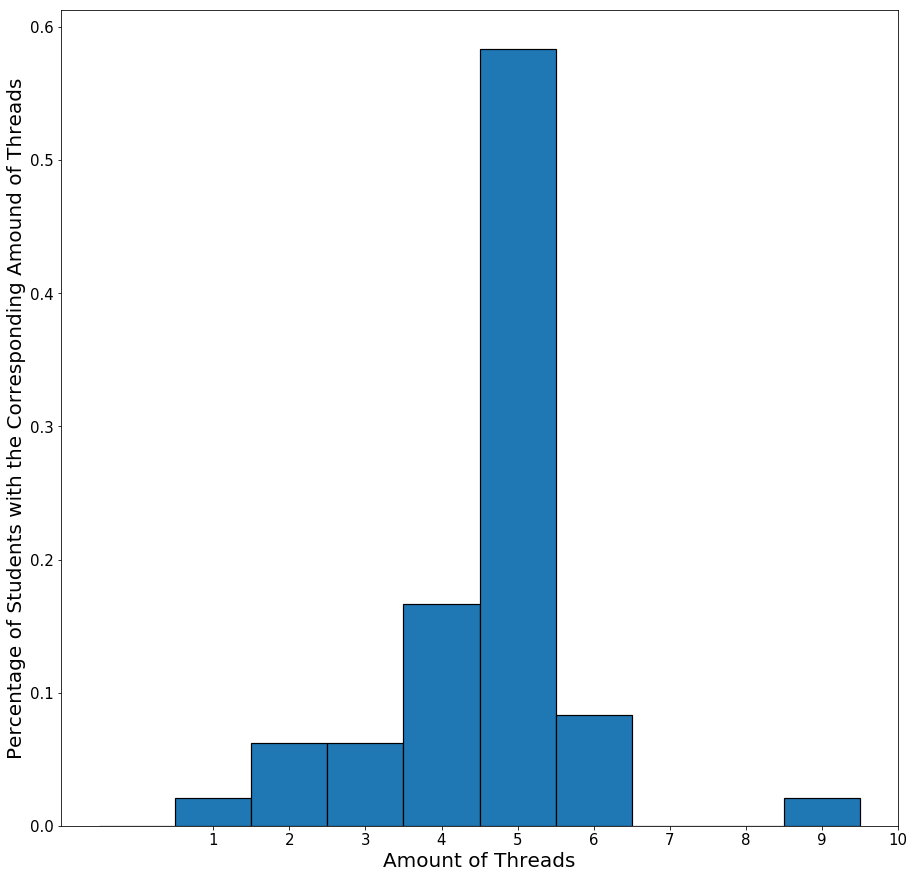

In [6]:
namelist = dfs.Author.unique()
amount_by_person = []
for name in namelist:
    amount_by_person.append(len(dfs[dfs.Author == name]))
dist_by_person = pd.DataFrame({'Author': namelist, 'Amount of Threads': amount_by_person})
dist_by_person = dist_by_person.sort_values(['Amount of Threads'], ascending = False).reset_index(drop = True)
fig, ax = plt.subplots(figsize=(15, 15))
ax.hist(dist_by_person['Amount of Threads'], bins = np.arange(11), density=True, alpha=1, edgecolor='black', linewidth=1.2)
plt.xlabel('Amount of Threads', fontsize = 20)
plt.ylabel('Percentage of Students with the Corresponding Amound of Threads', fontsize = 20)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.xticks(np.arange(1.5, 11.5, 1), np.arange(1, 11, 1))
plt.show()

Conclusion: Most students are finishing the task required by the syllabus. However, there are still some students who are willing to post more threads than required. They might be those who are really interested in the reading materials assigned by the professor.

## How can we predict whether a student will post more than five threads or not at the very beginning of the class?

#### Hypothesis: Students who post their first threads early are likely to post more threads.

Here I use a scatter plot with a best fit line to visualize the relationship between the date a student posts his or her first threads and the total amount of threads that student posts. (The first day of the class is Aug. 20th, 2018.)

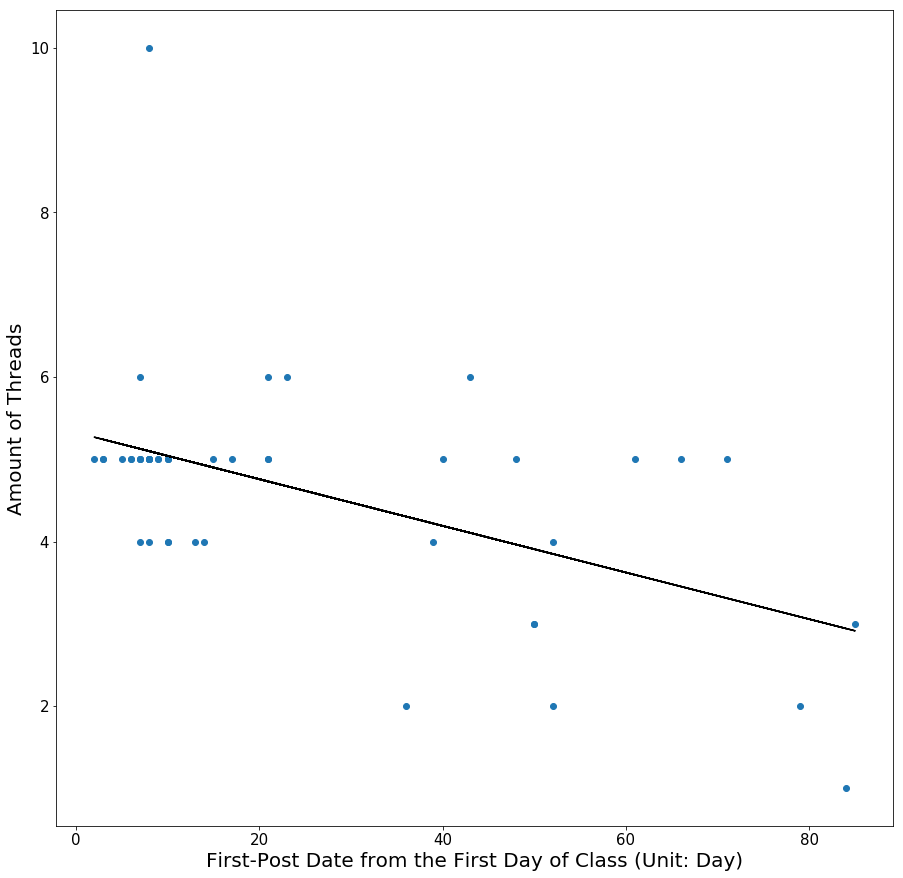

In [7]:
from datetime import datetime
from scipy import stats
temp_date = []
for date in dfs.Time:
    temp_date.append(date.day)
dfs['Day'] = temp_date
temp4 = []
for name in namelist:
    temp1 = dfs[dfs.Author == name]
    temp2 = temp1[temp1.Month == np.min(temp1.Month)]
    temp3 = temp2[temp2.Day == np.min(temp2.Day)]
    temp4.append('2018-' + str(temp3.Month.iloc[0]) + '-' + str(temp3.Day.iloc[0]))
temp5 = pd.DataFrame(temp4, index = namelist).reset_index()
temp5.columns = ['Author', 'First-Post Date']
temp6 = temp5.merge(dist_by_person, on = 'Author', how = 'inner')
date = temp6['First-Post Date']
startdate = datetime.strptime('2018-8-20', '%Y-%m-%d')
temp7 = []
for i in date:
    temp8 = datetime.strptime(i, '%Y-%m-%d') - startdate
    temp7.append(temp8.days)
temp6['First-Post Date from the First Day of Class (Unit: Day)'] = temp7
dateframe_for_reg = temp6.copy()
slope, intercept, r_value, p_value, std_err = stats.linregress(dateframe_for_reg['First-Post Date from the First Day of Class (Unit: Day)'], dateframe_for_reg['Amount of Threads'])
line = slope * dateframe_for_reg['First-Post Date from the First Day of Class (Unit: Day)'] + intercept
fig, ax = plt.subplots(figsize=(15, 15))
ax.scatter(dateframe_for_reg['First-Post Date from the First Day of Class (Unit: Day)'], dateframe_for_reg['Amount of Threads'])
ax.plot(dateframe_for_reg['First-Post Date from the First Day of Class (Unit: Day)'], line, color = 'k')
plt.xlabel('First-Post Date from the First Day of Class (Unit: Day)', fontsize = 20)
plt.ylabel('Amount of Threads', fontsize = 20)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.show()

The results can also be shown in a more statistical manner:

In [8]:
import statsmodels.api as sm
X = dateframe_for_reg['First-Post Date from the First Day of Class (Unit: Day)']
y = dateframe_for_reg['Amount of Threads']
X = sm.add_constant(X)
linearmodel = sm.OLS(y, X).fit()
linearmodel.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      Amount of Threads   R-squared:                       0.260
Model:                            OLS   Adj. R-squared:                  0.244
Method:                 Least Squares   F-statistic:                     16.16
Date:                Mon, 19 Nov 2018   Prob (F-statistic):           0.000214
Time:                        19:16:09   Log-Likelihood:                -74.669
No. Observations:                  48   AIC:                             153.3
Df Residuals:                      46   BIC:                             157.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===========================================================================================================================
                                                              coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------------------
const                                                       5.3249      0.243     21.942      0.000       4.836       5.813
First-Post Date from the First Day of Class (Unit: Day)    -0.0284      0.007     -4.020      0.000      -0.043      -0.014
==============================================================================
Omnibus:                       27.564   Durbin-Watson:                   1.823
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               71.594
Skew:                           1.481   Prob(JB):                     2.84e-16
Kurtosis:                       8.198   Cond. No.                         49.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Can we use the linear regression model to predict the total amount of threads just based on the first-post date from the first day of class?

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 100)
reg = LinearRegression().fit(X_train, y_train)
reg_test_score = reg.score(X_test, y_test)
print('The accuracy score of the test set data based on the OLS model: ' + str(reg_test_score))

The accuracy score of the test set data based on the OLS model: 0.28357686660147874


The low accuracy score indicates that we cannot simply use the first-post date to predict the exact amount of the threads. However, can we use the linear model to predict whether the amount is greater than or equal to five?

In [10]:
temp1 = []
for num in reg.predict(X_test):
    if (num >=5):
        temp1.append(1)
    else:
        temp1.append(0)
temp2 = []
for num in y_test:
    if (num >=5):
        temp2.append(1)
    else:
        temp2.append(0)
temp3 = []
for k in range(len(y_test)):
    if (temp1[k] == temp2[k]):
        temp3.append(1)
    else:
        temp3.append(0)
classification_test_score = np.sum(temp3)/len(temp3)
print('The accuracy score of the test set data based on the OLS classification (greater or smaller than 5): ' + str(classification_test_score))

The accuracy score of the test set data based on the OLS classification (greater or smaller than 5): 0.75


The classification model performs better. Therefore, from the first-post date, we can at least have some knowledge about whether the total amount is greater than or equal to five or not.

Conclusion: There is significant statistical evidence to support the claim that those who post their first threads early post more threads throughout the semester, and we can use this linear relationship to classify whether a student is going to reach the requirement of posting at least five threads or not.